In [1]:
import pandas as pd
import numpy as np 
import os

In [2]:
df = pd.read_csv("issizlik-odenegi-verileri.csv")
df

,tarih,istanbul_turkiye,issizlik_odenegi_basvuru,issizlik_odenegi_hakeden
0,2007-01-01,İstanbul,6991,4098
1,2007-01-01,Türkiye,22244,19946
2,2007-02-01,İstanbul,8165,7088
3,2007-02-01,Türkiye,24321,21810
4,2007-03-01,Türkiye,21378,19038
...,...,...,...,...
407,2023-12-01,İstanbul,29224,15226
408,2024-01-01,Türkiye,151557,77952
409,2024-01-01,İstanbul,35381,20577
410,2024-02-01,İstanbul,33129,17448


In [4]:
df.describe()

,issizlik_odenegi_basvuru,issizlik_odenegi_hakeden
count,412.000000,412.000000
mean,56430.385922,29388.509709
std,50101.034740,23410.190778
min,5542.000000,2950.000000
25%,21233.250000,10898.750000
50%,34949.000000,21970.500000
75%,83755.750000,38530.500000
max,308968.000000,129795.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   tarih                     412 non-null    object
 1   istanbul_turkiye          412 non-null    object
 2   issizlik_odenegi_basvuru  412 non-null    int64 
 3   issizlik_odenegi_hakeden  412 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 13.0+ KB


In [7]:
df.duplicated().sum()

0

In [8]:
df.shape

(412, 4)

In [13]:
df.head()

,tarih,istanbul_turkiye,issizlik_odenegi_basvuru,issizlik_odenegi_hakeden
0,2007-01-01,İstanbul,6991,4098
1,2007-01-01,Türkiye,22244,19946
2,2007-02-01,İstanbul,8165,7088
3,2007-02-01,Türkiye,24321,21810
4,2007-03-01,Türkiye,21378,19038


In [15]:
df['istanbul_turkiye'].unique()

array(['İstanbul', 'Türkiye'], dtype=object)

In [26]:
df['Yeni_Tarih'] = pd.to_datetime(df['tarih'])
df

,tarih,istanbul_turkiye,issizlik_odenegi_basvuru,issizlik_odenegi_hakeden,Yeni_Tarih
0,2007-01-01,İstanbul,6991,4098,2007-01-01
1,2007-01-01,Türkiye,22244,19946,2007-01-01
2,2007-02-01,İstanbul,8165,7088,2007-02-01
3,2007-02-01,Türkiye,24321,21810,2007-02-01
4,2007-03-01,Türkiye,21378,19038,2007-03-01
...,...,...,...,...,...
407,2023-12-01,İstanbul,29224,15226,2023-12-01
408,2024-01-01,Türkiye,151557,77952,2024-01-01
409,2024-01-01,İstanbul,35381,20577,2024-01-01
410,2024-02-01,İstanbul,33129,17448,2024-02-01


In [47]:
def extract_month_and_year(a):
    parts = str(a).split('-')
    return parts[0], parts[1]

df[['Year','Month']] = df['Yeni_Tarih'].apply(lambda x : pd.Series(extract_month_and_year(x)))
df.head()

,tarih,istanbul_turkiye,issizlik_odenegi_basvuru,issizlik_odenegi_hakeden,Yeni_Tarih,Year,Month
0,2007-01-01,İstanbul,6991,4098,2007-01-01,2007,01
1,2007-01-01,Türkiye,22244,19946,2007-01-01,2007,01
2,2007-02-01,İstanbul,8165,7088,2007-02-01,2007,02
3,2007-02-01,Türkiye,24321,21810,2007-02-01,2007,02
4,2007-03-01,Türkiye,21378,19038,2007-03-01,2007,03


In [52]:
df.drop('Yeni_Tarih',axis=1,inplace=True)

In [53]:
df.head()

,tarih,istanbul_turkiye,issizlik_odenegi_basvuru,issizlik_odenegi_hakeden,Year,Month
0,2007-01-01,İstanbul,6991,4098,2007,01
1,2007-01-01,Türkiye,22244,19946,2007,01
2,2007-02-01,İstanbul,8165,7088,2007,02
3,2007-02-01,Türkiye,24321,21810,2007,02
4,2007-03-01,Türkiye,21378,19038,2007,03


In [55]:
df['Year'].unique()

array(['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024'], dtype=object)

In [57]:
df.groupby(['istanbul_turkiye','Year'])['issizlik_odenegi_basvuru'].sum().reset_index()

,istanbul_turkiye,Year,issizlik_odenegi_basvuru
0,Türkiye,2007,242816
1,Türkiye,2008,362366
2,Türkiye,2009,562524
3,Türkiye,2010,427043
4,Türkiye,2011,441237
5,Türkiye,2012,566475
6,Türkiye,2013,743410
7,Türkiye,2014,899795
8,Türkiye,2015,1085270
9,Türkiye,2016,1518086


In [68]:
x = df.groupby(['istanbul_turkiye','Year']).sum(['issizlik_odenegi_basvuru','issizlik_odenegi_hakeden']).reset_index()
x['issizlik_odenegi_hakedemeyen'] = x['issizlik_odenegi_basvuru'] - x['issizlik_odenegi_hakeden']
turkiye = x[x['istanbul_turkiye'] == 'Türkiye']
turkiye

,istanbul_turkiye,Year,issizlik_odenegi_basvuru,issizlik_odenegi_hakeden,issizlik_odenegi_hakedemeyen
0,Türkiye,2007,242816,213456,29360
1,Türkiye,2008,362366,298457,63909
2,Türkiye,2009,562524,388284,174240
3,Türkiye,2010,427043,318094,108949
4,Türkiye,2011,441237,313409,127828
5,Türkiye,2012,566475,347866,218609
6,Türkiye,2013,743410,380950,362460
7,Türkiye,2014,899795,439010,460785
8,Türkiye,2015,1085270,500274,584996
9,Türkiye,2016,1518086,792961,725125


In [70]:
import seaborn as sns 
import matplotlib.pyplot as plt

/var/folders/4c/qsq564456sj39672nctb1blh0000gn/T/ipykernel_13286/2981286215.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45, ha='right')


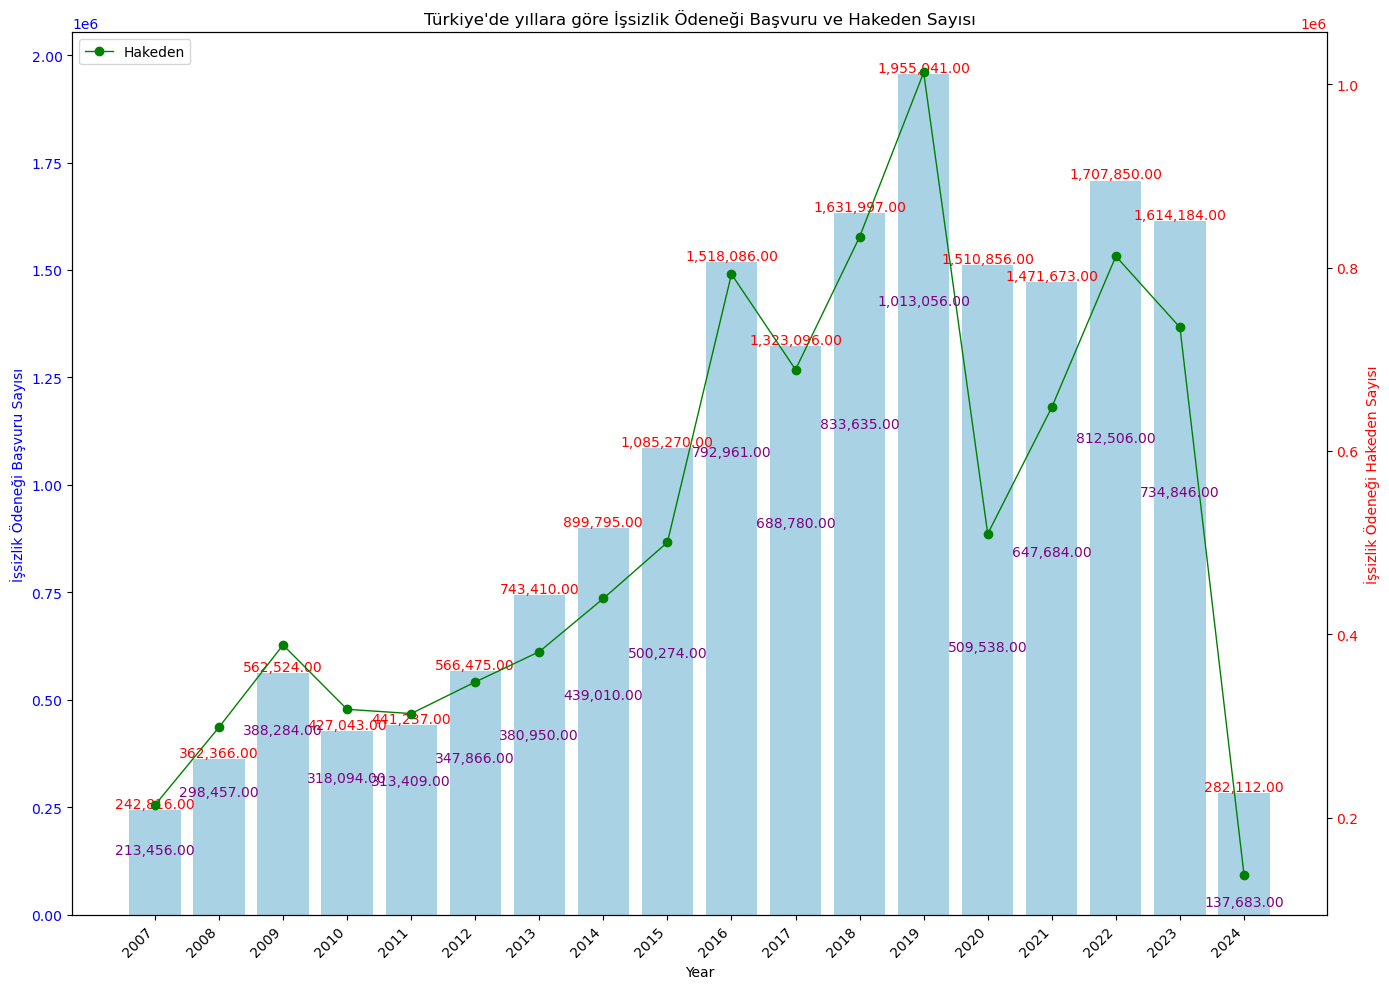

In [172]:
fig , ax1 = plt.subplots(figsize=(14,10))
# for first graph
sns.barplot(data=turkiye, x ='Year',
                    y = 'issizlik_odenegi_basvuru', ax = ax1,color='skyblue',alpha=0.8)
ax1.set_ylabel('İşsizlik Ödeneği Başvuru Sayısı', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45, ha='right')

for i, val in enumerate(turkiye['issizlik_odenegi_basvuru']):
    ax1.text(i, val + 5000, f'{val:,.2f}', color='red',ha='center',fontsize=10)

ax2 = ax1.twinx()
ax2.plot(turkiye['Year'], turkiye['issizlik_odenegi_hakeden'] ,linewidth=1,color='green', label='Hakeden', marker='o')
ax2.set_ylabel('İşsizlik Ödeneği Hakeden Sayısı', color='red')
ax2.tick_params(axis='y',labelcolor='red')

for i, val in enumerate(turkiye['issizlik_odenegi_hakeden']):
    ax2.text(i, val * 0.75, f'{val:,.2f}', color='purple',fontsize=10 , ha='center')

plt.title("Türkiye'de yıllara göre İşsizlik Ödeneği Başvuru ve Hakeden Sayısı")
fig.tight_layout()
plt.legend(loc='upper left')
plt.show()

In [175]:
df['issizlik_odenegi_hakedemeyen'] = df['issizlik_odenegi_basvuru'] - df['issizlik_odenegi_hakeden']


In [176]:
df.head()

,tarih,istanbul_turkiye,issizlik_odenegi_basvuru,issizlik_odenegi_hakeden,Year,Month,issizlik_odenegi_hakedemeyen
0,2007-01-01,İstanbul,6991,4098,2007,01,2893
1,2007-01-01,Türkiye,22244,19946,2007,01,2298
2,2007-02-01,İstanbul,8165,7088,2007,02,1077
3,2007-02-01,Türkiye,24321,21810,2007,02,2511
4,2007-03-01,Türkiye,21378,19038,2007,03,2340


In [178]:
df['Hakeden_Oranı'] = (df['issizlik_odenegi_hakeden'] / df['issizlik_odenegi_basvuru']) * 100
print(f"Hakeden oranı: {Hakeden_Oranı}")

Hakeden oranı: 0      58.618223
1      89.669124
2      86.809553
3      89.675589
4      89.054168
         ...    
407    52.101013
408    51.434114
409    58.158334
410    52.666848
411    45.751599
Length: 412, dtype: float64


In [180]:
df['Hakeden_Oranı'] = round(df['Hakeden_Oranı'],2)
df.head()

,tarih,istanbul_turkiye,issizlik_odenegi_basvuru,issizlik_odenegi_hakeden,Year,Month,issizlik_odenegi_hakedemeyen,Hakeden_Oranı
0,2007-01-01,İstanbul,6991,4098,2007,01,2893,58.62
1,2007-01-01,Türkiye,22244,19946,2007,01,2298,89.67
2,2007-02-01,İstanbul,8165,7088,2007,02,1077,86.81
3,2007-02-01,Türkiye,24321,21810,2007,02,2511,89.68
4,2007-03-01,Türkiye,21378,19038,2007,03,2340,89.05


In [181]:
df['Hakedemenyen_Oranı'] = round((df['issizlik_odenegi_hakedemeyen'] / df['issizlik_odenegi_basvuru']) * 100,2)
df.head()


,tarih,istanbul_turkiye,issizlik_odenegi_basvuru,issizlik_odenegi_hakeden,Year,Month,issizlik_odenegi_hakedemeyen,Hakeden_Oranı,Hakedemenyen_Oranı
0,2007-01-01,İstanbul,6991,4098,2007,01,2893,58.62,41.38
1,2007-01-01,Türkiye,22244,19946,2007,01,2298,89.67,10.33
2,2007-02-01,İstanbul,8165,7088,2007,02,1077,86.81,13.19
3,2007-02-01,Türkiye,24321,21810,2007,02,2511,89.68,10.32
4,2007-03-01,Türkiye,21378,19038,2007,03,2340,89.05,10.95


In [183]:
turkiye_hak_edemeyen = df.query("istanbul_turkiye == 'Türkiye'").groupby(['istanbul_turkiye','Year'])['issizlik_odenegi_hakedemeyen'].sum().reset_index()
turkiye_hak_edemeyen

,istanbul_turkiye,Year,issizlik_odenegi_hakedemeyen
0,Türkiye,2007,29360
1,Türkiye,2008,63909
2,Türkiye,2009,174240
3,Türkiye,2010,108949
4,Türkiye,2011,127828
5,Türkiye,2012,218609
6,Türkiye,2013,362460
7,Türkiye,2014,460785
8,Türkiye,2015,584996
9,Türkiye,2016,725125


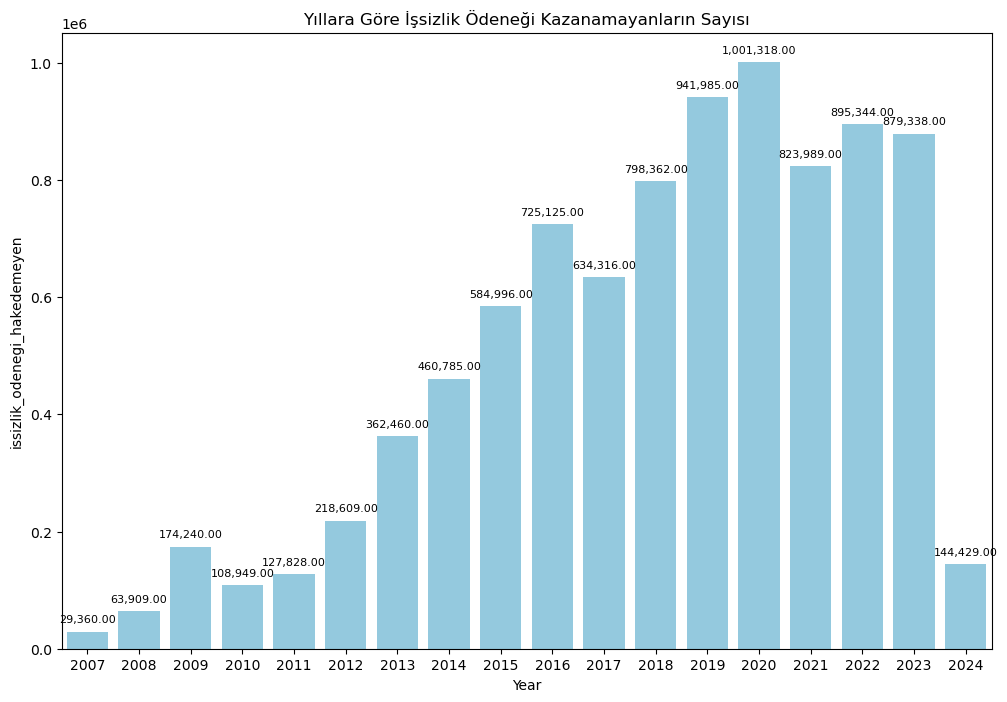

In [208]:
plt.figure(figsize=(12,8))
x = sns.barplot(data = turkiye_hak_edemeyen, x = 'Year', y = 'issizlik_odenegi_hakedemeyen', color='skyblue')

for i in x.containers:
    x.bar_label(i, labels=[f'{val:,.2f}' for val in i.datavalues], fontsize=8,padding=5)
plt.title('Yıllara Göre İşsizlik Ödeneği Kazanamayanların Sayısı')
plt.show()

In [209]:
df.head()

,tarih,istanbul_turkiye,issizlik_odenegi_basvuru,issizlik_odenegi_hakeden,Year,Month,issizlik_odenegi_hakedemeyen,Hakeden_Oranı,Hakedemenyen_Oranı
0,2007-01-01,İstanbul,6991,4098,2007,01,2893,58.62,41.38
1,2007-01-01,Türkiye,22244,19946,2007,01,2298,89.67,10.33
2,2007-02-01,İstanbul,8165,7088,2007,02,1077,86.81,13.19
3,2007-02-01,Türkiye,24321,21810,2007,02,2511,89.68,10.32
4,2007-03-01,Türkiye,21378,19038,2007,03,2340,89.05,10.95


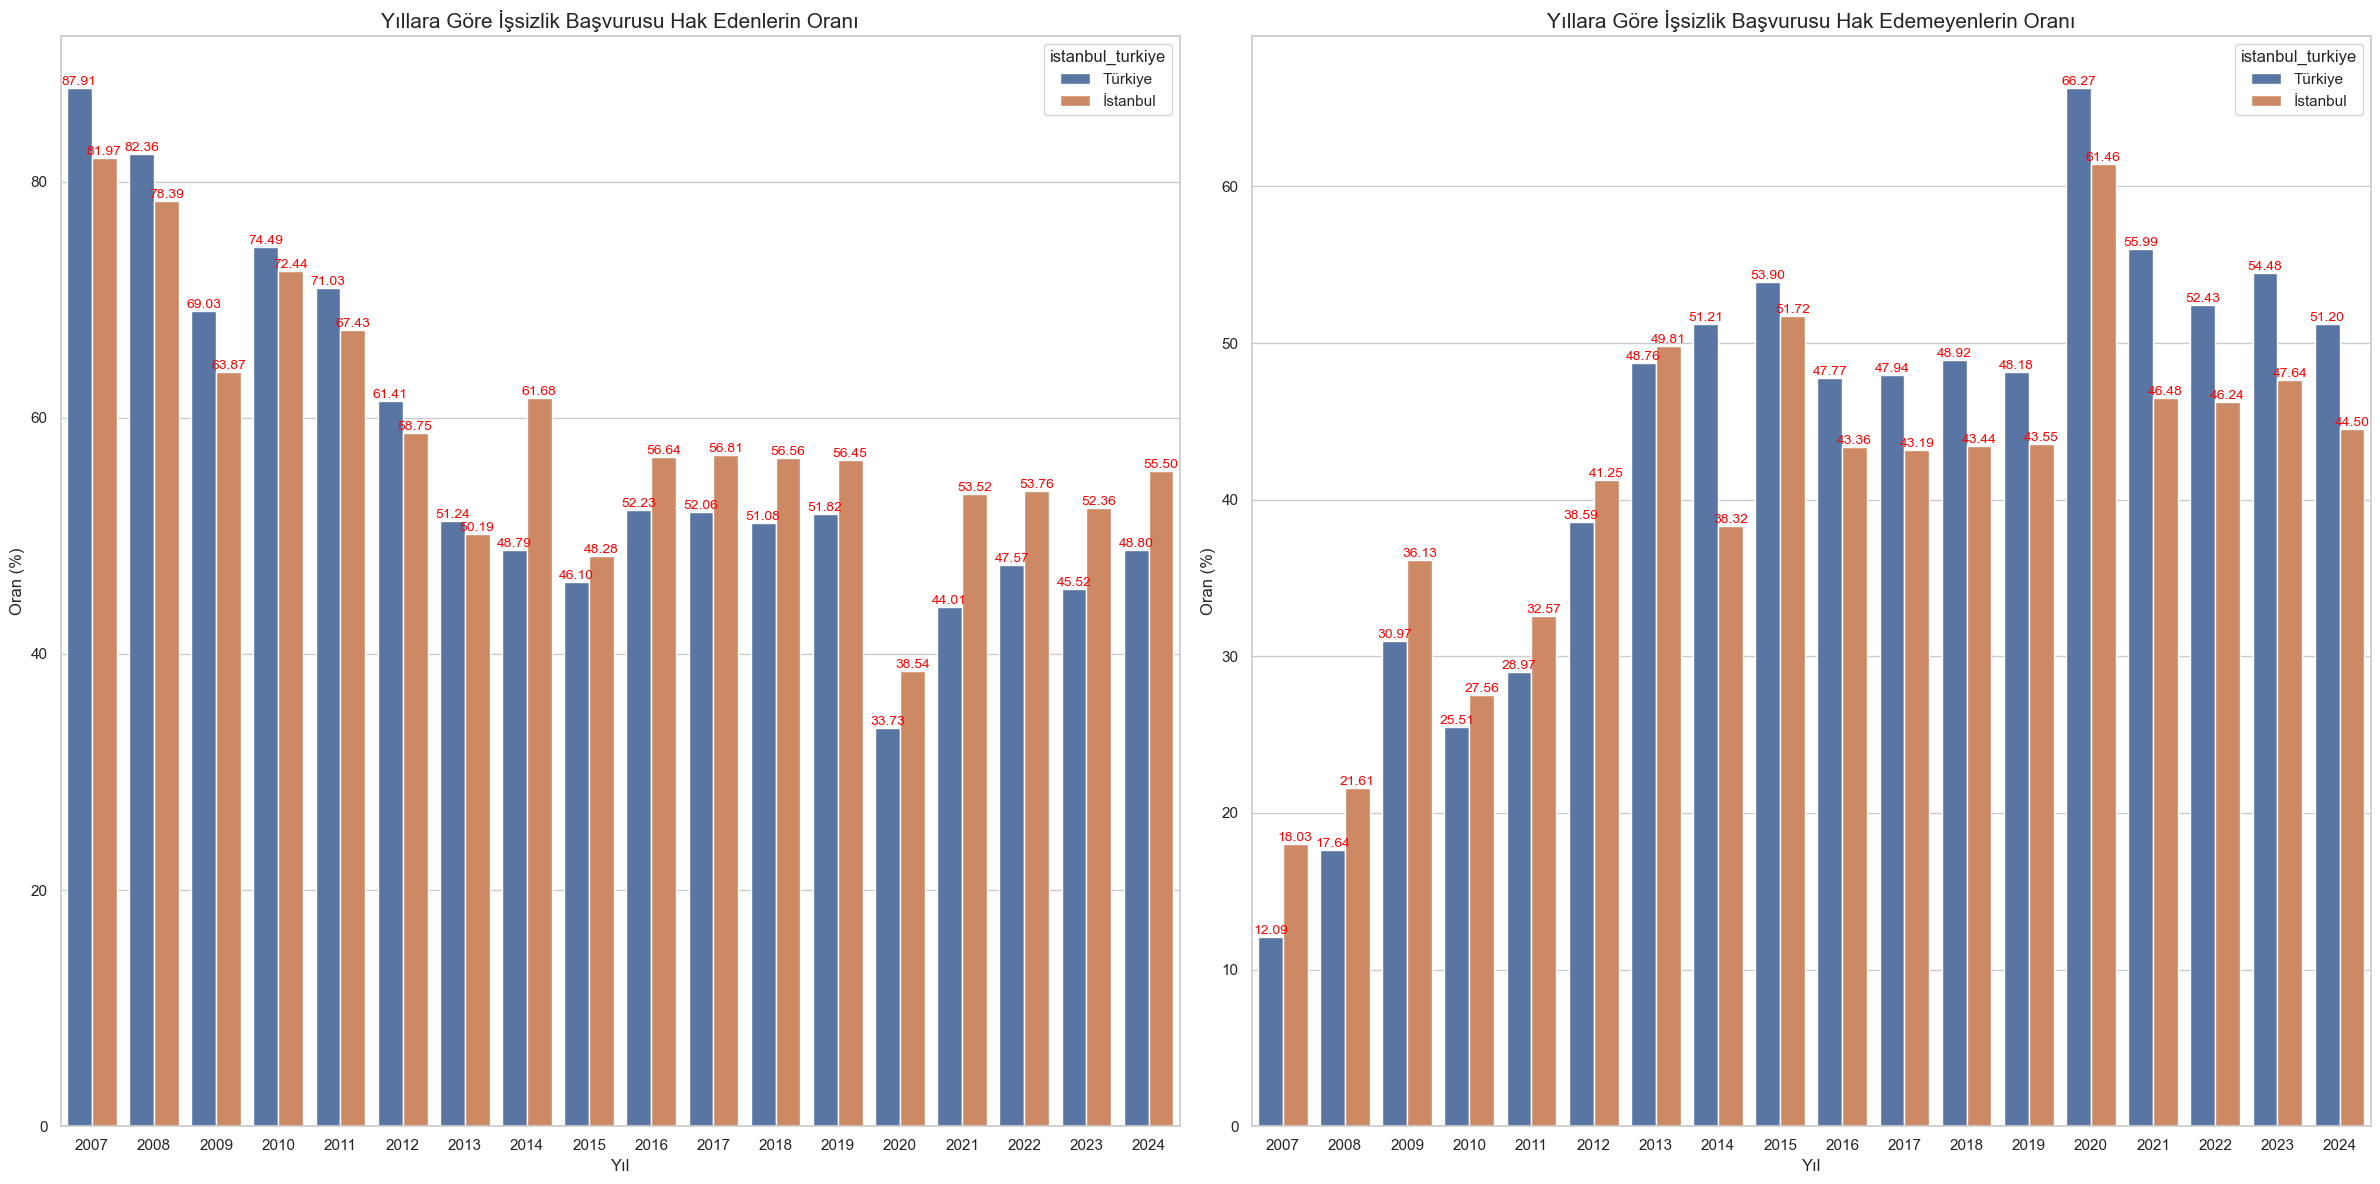

In [288]:
new_df = df.groupby(['istanbul_turkiye','Year'])[['issizlik_odenegi_basvuru','issizlik_odenegi_hakeden','issizlik_odenegi_hakedemeyen']].sum().reset_index()
new_df['Hakeden_Oran'] = round((new_df['issizlik_odenegi_hakeden'] / new_df['issizlik_odenegi_basvuru']) * 100,2)
new_df['Hakedemeyen_Oran'] = round((new_df['issizlik_odenegi_hakedemeyen'] / new_df['issizlik_odenegi_basvuru']) * 100,2)
new_df

fig , ax = plt.subplots(1, 2 ,figsize=(24,12))

# first graph( for hakeden_oran )
sns.barplot(data=new_df, x = 'Year', y = 'Hakeden_Oran', hue='istanbul_turkiye', ax = ax[0])
ax[0].set_title('Yıllara Göre İşsizlik Başvurusu Hak Edenlerin Oranı',fontsize = 15)
ax[0].set_ylabel('Oran (%)', fontsize = 12)
ax[0].set_xlabel('Yıl', fontsize=12)

for i in ax[0].containers:
    ax[0].bar_label(i, fmt='%.2f', fontsize = 10, color='red')

# second graph(for hakedemeyen_oran)
ax[1] = sns.barplot(data=new_df, x = 'Year', y = 'Hakedemeyen_Oran', hue='istanbul_turkiye', ax = ax[1])
ax[1].set_title('Yıllara Göre İşsizlik Başvurusu Hak Edemeyenlerin Oranı', fontsize=15)
ax[1].set_ylabel('Oran (%)', fontsize=12)
ax[1].set_xlabel('Yıl', fontsize=12)

for i in ax[1].containers:
    ax[1].bar_label(i, fmt='%.2f', fontsize = 10, color='red')

sns.set_theme(style='whitegrid')
fig.tight_layout()
plt.show()

Türkiye'de koronaya bağlı ilk vaka 11 Mart 2020' de Bakanlık tarafından açıklanmıştır

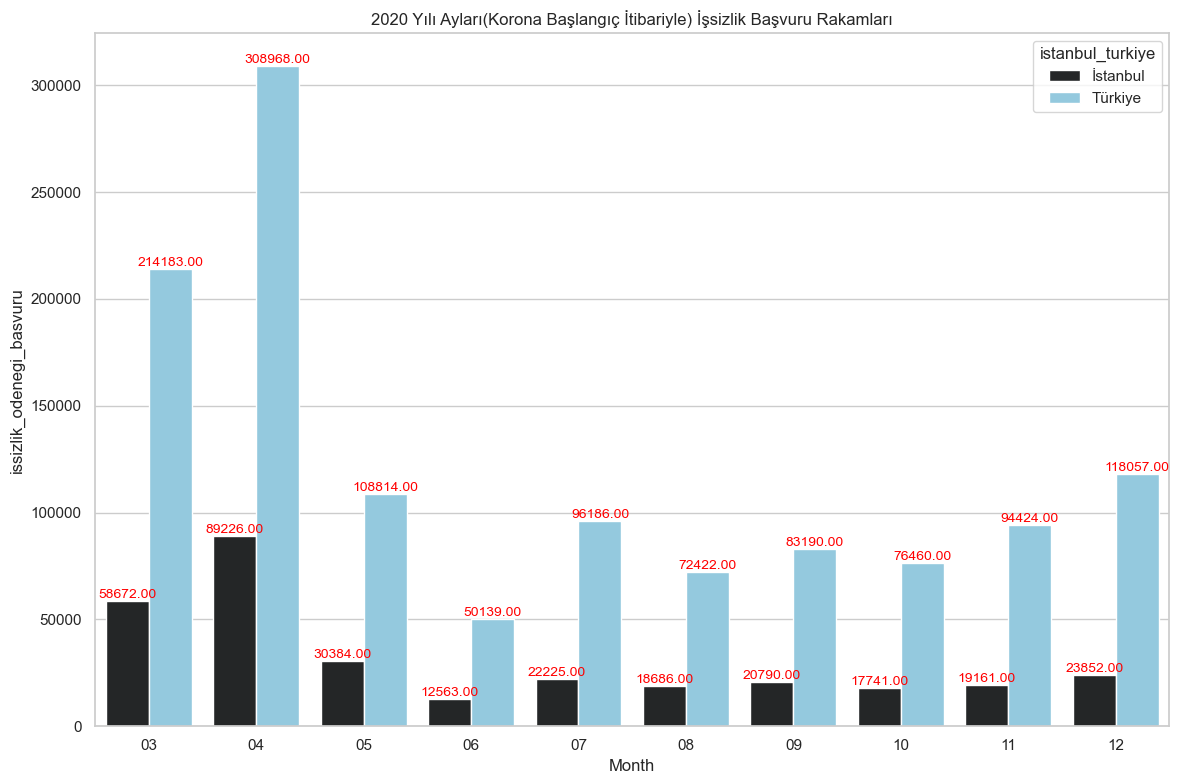

In [326]:
df.query("Year == '2020' & Month >= '03'")


plt.figure(figsize=(12,8))
ax = sns.barplot(data = df.query("Year == '2020' & Month >= '03'"), x = 'Month', y= 'issizlik_odenegi_basvuru', hue='istanbul_turkiye',palette='dark:skyblue')

for rakam in ax.containers:
    ax.bar_label(rakam, fmt='%.2f', fontsize=10, color='red')


plt.title('2020 Yılı Ayları(Korona Başlangıç İtibariyle) İşsizlik Başvuru Rakamları')
plt.tight_layout()
plt.show()